  #  Проект:
# Определение перспективного тарифа для телеком компании 

In [187]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [188]:
#импорт таблиц
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

**Далее изучим общую информацию по имеющимся данным**

In [189]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [190]:
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [191]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [192]:
internet.head(15)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [193]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [194]:
messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [195]:
tariffs.head(15)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [196]:
users.head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


**Вывод: Необходимо привести дату к соответствующему формату, округлить в большую сторону значения звонков, смс и траффика, привести их к соответствующим форматам, перевести мб и гб и округлить.  
Во всех таблицах добавим колонку год, для проверки данных (везде ли один год)
Нулевые значения в звонках, возможно, связаны с округлением очень коротких вызовов, а также при сбросе вызова при наборе номера.

In [197]:
#приведем формат к необходимому (дата_время)
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
#добавим столбец с номером месяца
calls['month'] = calls['call_date'].dt.month
#добавим столбец с номером года, для проверки все ли строки по 2018
calls['year'] = calls['call_date'].dt.year
# проверим год - все 2018
calls.year.value_counts()
#общий вид
calls

,id,call_date,duration,user_id,month,year
0,1000_0,2018-07-25,0.00,1000,7,2018
1,1000_1,2018-08-17,0.00,1000,8,2018
2,1000_2,2018-06-11,2.85,1000,6,2018
3,1000_3,2018-09-21,13.80,1000,9,2018
4,1000_4,2018-12-15,5.18,1000,12,2018
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,2018
202603,1499_216,2018-10-18,18.83,1499,10,2018
202604,1499_217,2018-11-10,10.81,1499,11,2018
202605,1499_218,2018-10-06,4.27,1499,10,2018


In [198]:
#приведем формат messages к необходимому (дата_время)
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
#добавим столбец с номером месяца
messages['month'] = messages['message_date'].dt.month
#добавим столбец с номером года, для проверки все ли строки по 2018
messages['year'] = messages['message_date'].dt.year
# проверим год - все 2018
messages.year.value_counts()
#общий вид
messages

,id,message_date,user_id,month,year
0,1000_0,2018-06-27,1000,6,2018
1,1000_1,2018-10-08,1000,10,2018
2,1000_2,2018-08-04,1000,8,2018
3,1000_3,2018-06-16,1000,6,2018
4,1000_4,2018-12-05,1000,12,2018
...,...,...,...,...,...
123031,1499_179,2018-12-12,1499,12,2018
123032,1499_180,2018-09-28,1499,9,2018
123033,1499_181,2018-09-27,1499,9,2018
123034,1499_182,2018-11-15,1499,11,2018


In [199]:
#приведем формат sessiom к необходимому (дата_время)
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
#добавим столбец с номером месяца
internet['month'] = internet['session_date'].dt.month
#добавим столбец с номером года, для проверки все ли строки по 2018
internet['year'] = internet['session_date'].dt.year
# проверим год - все 2018
internet.year.value_counts()
#поменям формат mb_used из object во float
internet.mb_used = internet.mb_used.astype('int')
#общий вид
internet

,id,mb_used,session_date,user_id,month,year
0,1000_0,112,2018-11-25,1000,11,2018
1,1000_1,1052,2018-09-07,1000,9,2018
2,1000_2,1197,2018-06-25,1000,6,2018
3,1000_3,550,2018-08-22,1000,8,2018
4,1000_4,302,2018-09-24,1000,9,2018
...,...,...,...,...,...,...
149391,1499_152,318,2018-10-03,1499,10,2018
149392,1499_153,490,2018-12-14,1499,12,2018
149393,1499_154,0,2018-10-27,1499,10,2018
149394,1499_155,1246,2018-11-26,1499,11,2018


In [200]:
#проверим данные в таблице calls и internet
calls.duration.value_counts()
internet.mb_used.value_counts().sort_values(ascending = False)

0       19699
332       231
381       229
252       222
376       222
        ...  
1554        1
1579        1
1490        1
1323        1
1329        1
Name: mb_used, Length: 1421, dtype: int64

In [201]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
year            149396 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.8+ MB


"Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута." - 
Исходя из этого, считаю целесообразным заменить большое количество строк с 0 продолжительностью звонка на 1 сек

In [202]:
#округлим все звонки  в большую сторону и заменим 0 на 1


calls.duration = (calls.duration  
                                 .apply(np.ceil)
                                 .replace(0,1)
                 )




In [203]:
#переведем мб в Гб и округлим в большую сторону
internet.mb_used = (internet.mb_used.apply(np.ceil)
                                    .replace(0,1)
                    )
                    #переименуем                 
   
internet

,id,mb_used,session_date,user_id,month,year
0,1000_0,112.00,2018-11-25,1000,11,2018
1,1000_1,1052.00,2018-09-07,1000,9,2018
2,1000_2,1197.00,2018-06-25,1000,6,2018
3,1000_3,550.00,2018-08-22,1000,8,2018
4,1000_4,302.00,2018-09-24,1000,9,2018
...,...,...,...,...,...,...
149391,1499_152,318.00,2018-10-03,1499,10,2018
149392,1499_153,490.00,2018-12-14,1499,12,2018
149393,1499_154,1.00,2018-10-27,1499,10,2018
149394,1499_155,1246.00,2018-11-26,1499,11,2018


In [204]:
#посчитаем время звонков каждого пользоателя по месяцам
users_calls = calls.pivot_table(index = ['user_id','month'] , values = 'duration', aggfunc = 'sum')
# заполним пробелы на 0
users_calls = users_calls.fillna(0)
users_calls.head(30)

duration
user_id month          
1000    5        164.00
        6        187.00
        7        346.00
        8        418.00
        9        478.00
        10       363.00
        11       344.00
        12       341.00
1001    11       444.00
        12       430.00
1002    6        118.00
        7        219.00
        8        294.00
        9        217.00
        10       221.00
        11       250.00
        12       242.00
1003    8        392.00
        9        990.00
        10       866.00
        11       844.00
        12       822.00
1004    5         37.00
        6        177.00
        7        137.00
        8        138.00
        9        125.00
        10       153.00
        11       121.00
        12       136.00

In [205]:
#посчитаем время звонков каждого пользоателя по месяцам
users_sms = messages.pivot_table(index = ['user_id','month'],   aggfunc = 'count', values = 'id')
# заполним пробелы на 0
users_sms = users_sms.fillna(0)
users_sms

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [206]:
internet.pivot_table(index = ['user_id','month'],  values = 'mb_used', aggfunc = 'sum')

mb_used
user_id month          
1000    5       2253.00
        6      23218.00
        7      13989.00
        8      14045.00
        9      14558.00
...                 ...
1498    10     20565.00
1499    9       1845.00
        10     17781.00
        11     17955.00
        12     13043.00

[3203 rows x 1 columns]

In [207]:
#посчитаем время звонков каждого пользоателя по месяцам
users_inet = internet.pivot_table(index = ['user_id','month'],  values = 'mb_used', aggfunc = 'sum')
# заполним пробелы на 0
users_inet = users_inet.fillna(0)
users_inet

mb_used
user_id month          
1000    5       2253.00
        6      23218.00
        7      13989.00
        8      14045.00
        9      14558.00
...                 ...
1498    10     20565.00
1499    9       1845.00
        10     17781.00
        11     17955.00
        12     13043.00

[3203 rows x 1 columns]

In [208]:
#установим удобный формат вывода чисел
pd.options.display.float_format = '{: .2f}'.format

In [209]:
#переведем мб в ГБ
users_inet.mb_used = (users_inet['mb_used']/1024)
users_inet.mb_used = users_inet.mb_used.apply(np.ceil)
users_inet = users_inet.rename(columns = {'mb_used':'gb_used'})
users_inet

gb_used
user_id month         
1000    5         3.00
        6        23.00
        7        14.00
        8        14.00
        9        15.00
...                ...
1498    10       21.00
1499    9         2.00
        10       18.00
        11       18.00
        12       13.00

[3203 rows x 1 columns]

In [210]:
calls_sms_inet = (
                  users_calls.merge(users_inet,on=['user_id','month'], how = 'outer')
                 .merge(users_sms,on=['user_id','month'],how = 'outer').fillna(0)
                 
                 
)
calls_sms_inet=calls_sms_inet.rename(columns = {'id':'sms'})
calls_sms_inet

duration  gb_used    sms
user_id month                          
1000    5        164.00     3.00  22.00
        6        187.00    23.00  60.00
        7        346.00    14.00  75.00
        8        418.00    14.00  81.00
        9        478.00    15.00  57.00
...                 ...      ...    ...
1489    8          0.00    11.00  17.00
        9          0.00    17.00  32.00
        10         0.00    20.00  21.00
        11         0.00    18.00  20.00
        12         0.00    17.00  35.00

[3214 rows x 3 columns]

In [211]:
#создадим сводную таблиу
data_general = calls_sms_inet.join(users[['user_id','city','tariff']].set_index(['user_id']), on ='user_id').reset_index()
data_general

,user_id,month,duration,gb_used,sms,city,tariff
0,1000,5,164.00,3.00,22.00,Краснодар,ultra
1,1000,6,187.00,23.00,60.00,Краснодар,ultra
2,1000,7,346.00,14.00,75.00,Краснодар,ultra
3,1000,8,418.00,14.00,81.00,Краснодар,ultra
4,1000,9,478.00,15.00,57.00,Краснодар,ultra
...,...,...,...,...,...,...,...
3209,1489,8,0.00,11.00,17.00,Санкт-Петербург,smart
3210,1489,9,0.00,17.00,32.00,Санкт-Петербург,smart
3211,1489,10,0.00,20.00,21.00,Санкт-Петербург,smart
3212,1489,11,0.00,18.00,20.00,Санкт-Петербург,smart


**Таким образом мы создали сводную таблицу с необходимыми для выполнения задач данными**

In [212]:
def cal_profit(row):
    """ Считает доход по месяцам, округляет возможные отрицательные значения сверхлимита до 0"""
    if row['tariff'] == 'ultra':
        if row['duration'] > tariffs.loc[1,'minutes_included']:
            netto_duration = (row['duration'] - tariffs.loc[1,'minutes_included'])*tariffs.loc[1,'rub_per_minute'] 
        else:
            netto_duration = 0
        if row['sms'] > tariffs.loc[1,'messages_included']:
            netto_sms = (row['sms']-tariffs.loc[1,'messages_included'])*tariffs.loc[1,'rub_per_message']
        else:
            netto_sms = 0
        if row['gb_used'] > (tariffs.loc[1,'mg_per_month_included']/1024):
            netto_inet = (row['gb_used'] - (tariffs.loc[1,'mg_per_month_included']/1024))*tariffs.loc[1,'rub_per_gb']
        else:
            netto_inet = 0
        netto_profit = netto_duration+netto_sms+netto_inet+1950
    else:
        if row['duration'] > tariffs.loc[0,'minutes_included']:
            netto_duration = (row['duration'] - tariffs.loc[0,'minutes_included'])*tariffs.loc[0,'rub_per_minute'] 
        else:
            netto_duration = 0
        if row['sms'] > tariffs.loc[0,'messages_included']:
            netto_sms = (row['sms']-tariffs.loc[0,'messages_included'])*tariffs.loc[0,'rub_per_message']
        else:
            netto_sms = 0
        if row['gb_used'] > (tariffs.loc[0,'mg_per_month_included']/1024):
            netto_inet = (row['gb_used'] - (tariffs.loc[0,'mg_per_month_included']/1024))*tariffs.loc[0,'rub_per_gb']
        else:
            netto_inet = 0
        netto_profit = netto_duration+netto_sms+netto_inet+550
    return netto_profit

In [213]:
data_general['profit'] = data_general.apply(cal_profit, axis=1)
data_general

,user_id,month,duration,gb_used,sms,city,tariff,profit
0,1000,5,164.00,3.00,22.00,Краснодар,ultra,1950.00
1,1000,6,187.00,23.00,60.00,Краснодар,ultra,1950.00
2,1000,7,346.00,14.00,75.00,Краснодар,ultra,1950.00
3,1000,8,418.00,14.00,81.00,Краснодар,ultra,1950.00
4,1000,9,478.00,15.00,57.00,Краснодар,ultra,1950.00
...,...,...,...,...,...,...,...,...
3209,1489,8,0.00,11.00,17.00,Санкт-Петербург,smart,550.00
3210,1489,9,0.00,17.00,32.00,Санкт-Петербург,smart,950.00
3211,1489,10,0.00,20.00,21.00,Санкт-Петербург,smart,1550.00
3212,1489,11,0.00,18.00,20.00,Санкт-Петербург,smart,1150.00


**Вывод: Мы провели анализ качества данных, заменили 0 в длительности услуг на 1, округлили значения в большую сторону, рассчитали доход по месяцам каждого пользователя и создали общую таблицу для дальнейшей работы**

### Опишем поведение клиентов оператора, исходя из выборки.
     - Расчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого      
    тарифа в месяц. 
     - Посчитаем среднее количество, дисперсию и стандартное отклонение. 
     - Построим гистограммы. 
     - Опишите распределения.

In [214]:
#осмторим описание данных по тарифу Ультра
data_ultra = data_general[['duration','gb_used','sms','tariff','profit']].query('tariff == "ultra"')

In [215]:
#осмторим описание данных по тарифу Смарт
data_smart = data_general[['duration','gb_used','sms','tariff','profit']].query('tariff == "smart"')

In [216]:
print('          Описание данных по тарифу Ультра')
print(data_ultra.describe())
print()
print('          Описание данных по тарифу Смарт')
print(data_smart.describe())

          Описание данных по тарифу Ультра
       duration  gb_used     sms   profit
count    985.00   985.00  985.00   985.00
mean     540.78    19.48   49.36  2069.54
std      325.74     9.85   47.80   374.68
min        0.00     0.00    0.00  1950.00
25%      292.00    12.00    6.00  1950.00
50%      532.00    19.00   38.00  1950.00
75%      773.00    27.00   79.00  1950.00
max     1727.00    49.00  224.00  4800.00

          Описание данных по тарифу Смарт
       duration  gb_used      sms   profit
count   2229.00  2229.00  2229.00  2229.00
mean     429.45    16.32    33.38  1304.80
std      194.87     5.74    28.23   826.68
min        0.00     0.00     0.00   550.00
25%      291.00    13.00    10.00   550.00
50%      435.00    17.00    28.00  1057.00
75%      560.00    20.00    51.00  1750.00
max     1471.00    38.00   143.00  6824.00


In [217]:
#рассчитаем дисперсию для тарифа Ультра
var_smart = np.var(data_smart, ddof=1)
var_smart

duration     37974.77
gb_used         32.97
sms            796.81
profit      683393.04
dtype: float64

In [218]:
#рассчитаем дисперсию для тарифа Смарт
var_ultra = np.var(data_ultra, ddof=1)
var_ultra

duration    106105.73
gb_used         96.93
sms           2285.27
profit      140382.41
dtype: float64

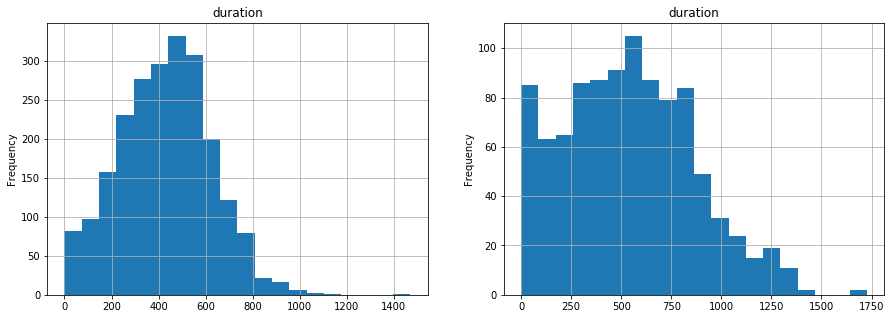

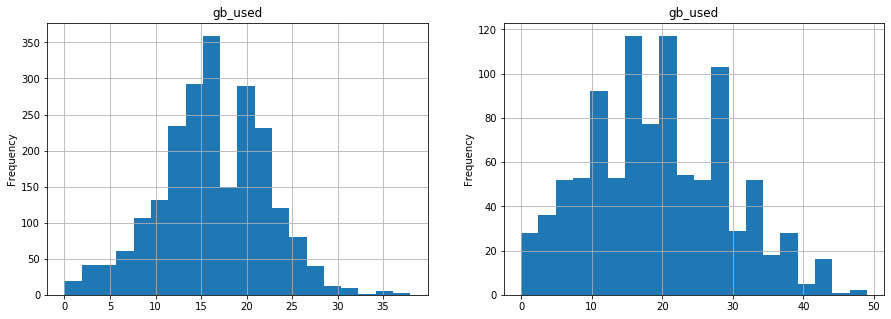

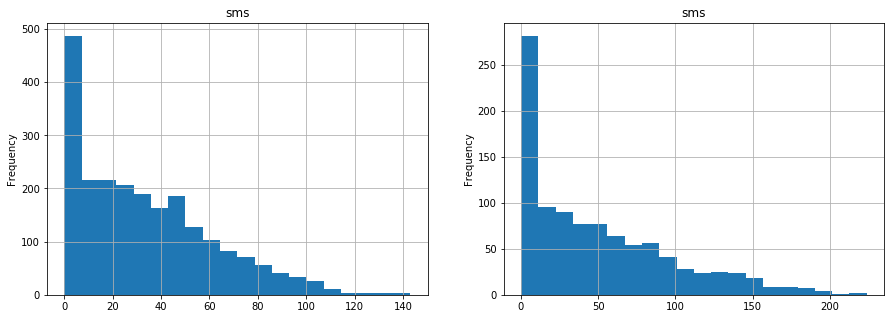

In [219]:
# рассмотрим гистограммы  для пользователей тарифа Смарт и Ультра
cols =['duration','gb_used','sms']

for col in cols:
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    plt.ylabel(col)
    plt.title(col)
    data_smart[col].plot(ax=axes[0], kind = 'hist', grid = True, bins = 20,  title= col, )
    data_ultra[col].plot(ax=axes[1], kind = 'hist', grid = True, bins = 20,  title= col, )
    

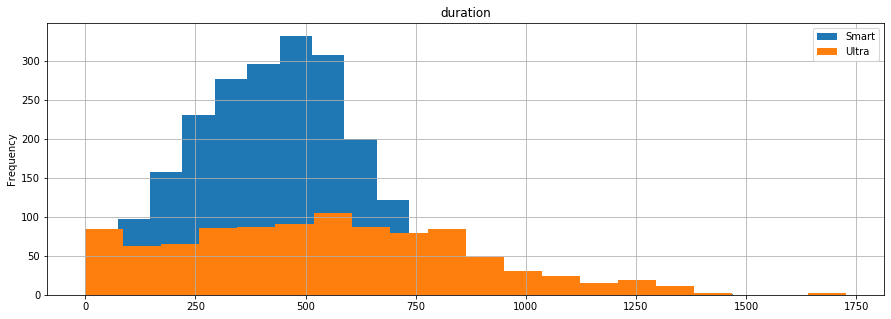

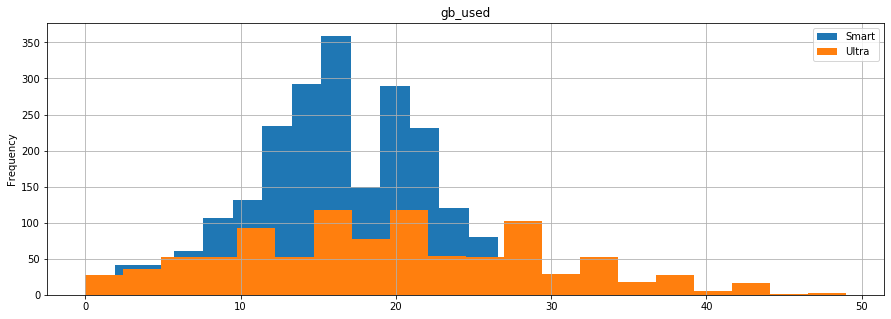

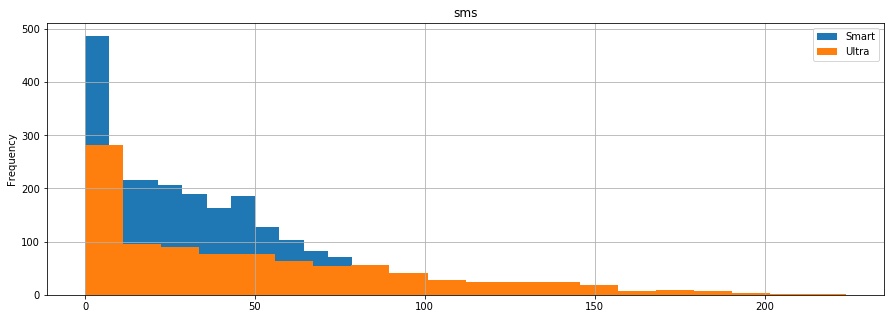

In [220]:
# рассмотрим гистограммы  для пользователей тарифа Смарт и Ультра
cols =['duration','gb_used','sms']

for col in cols:
    fig, axes = plt.subplots(figsize=(15,5))
    plt.ylabel(col)
    plt.title(col)
    data_smart[col].plot( kind = 'hist', grid = True, bins = 20,  title= col )
    data_ultra[col].plot( kind = 'hist', grid = True, bins = 20,  title= col )
    plt.legend(('Smart','Ultra'))
    plt.show

### Выводы по гистограмме
**Слева мы видим гистограммы распределения тарифа Ультра, справа тарифа Смарт, след блок совмещенный, для наглядности**  
   ##### По длительности звонков мы видим в обоих тарифах нормальное распределение, смещенное влево,что говорит о большом количестве пользователей, пользующимся звонками меньше медианы (median ultra = 532 , median smart = 435) в тарифе ульра особенно заметно большое количесвто нулевых значений, что говорит о том, что многие пользователи не использовали или мало использовали голосовые вызовы.  На совмещенной гистограмме видно насколько больше пользователи Смарта используют голосовую связь.  
   ###### По истраченным мегабайтам видно нормальное распределние, за исключением провалов на обоих тарифах в районе 18-19 ГБ. И снова пользователи Смарт используют больше услуг мобильного интернета.  
   ###### По смс мы видим сильно смещенное влево распределение, на обоих тарифах есть много людей, которые не пользуются смс вообще. Клиенты тарифа Ультра пользуются смс немного меньше, но в целом гораздо меньше бесплатного лимита (1000смс). Клиенты же смарта имееют много значений выше бесплатной нормы в 50 смс.  

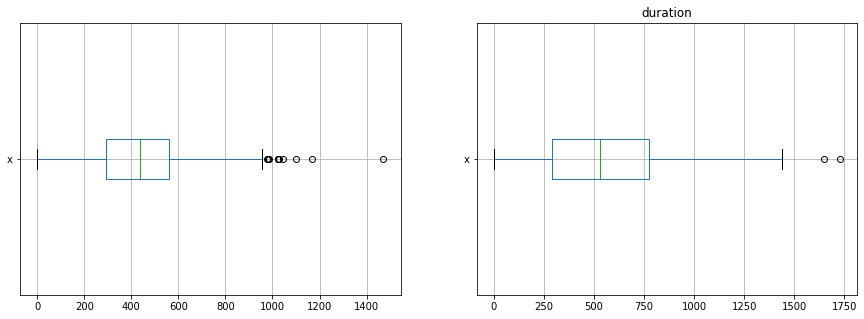

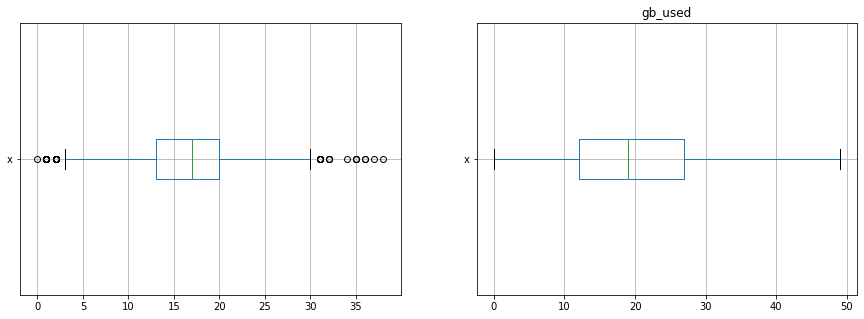

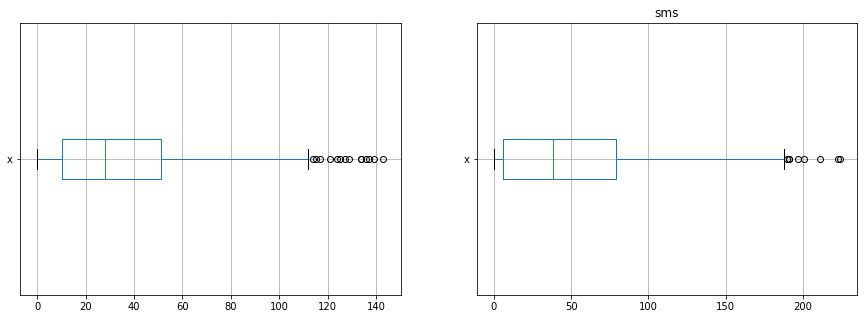

In [221]:
# рассмотрим   для пользователей тарифа Смарт и Ультра
cols =['duration','gb_used','sms']

for col in cols:
    fig, axes = plt.subplots(1,2, figsize=(15,5))
   
    pd.plotting.boxplot(data_smart[col], ax=axes[0], vert=False)
   
    pd.plotting.boxplot(data_ultra[col], ax=axes[1], vert=False)
    plt.title(col)
  

Диаграмма расброса подтверждает предидущие выводы

In [222]:
data_general.head()

,user_id,month,duration,gb_used,sms,city,tariff,profit
0,1000,5,164.00,3.00,22.00,Краснодар,ultra,1950.00
1,1000,6,187.00,23.00,60.00,Краснодар,ultra,1950.00
2,1000,7,346.00,14.00,75.00,Краснодар,ultra,1950.00
3,1000,8,418.00,14.00,81.00,Краснодар,ultra,1950.00
4,1000,9,478.00,15.00,57.00,Краснодар,ultra,1950.00


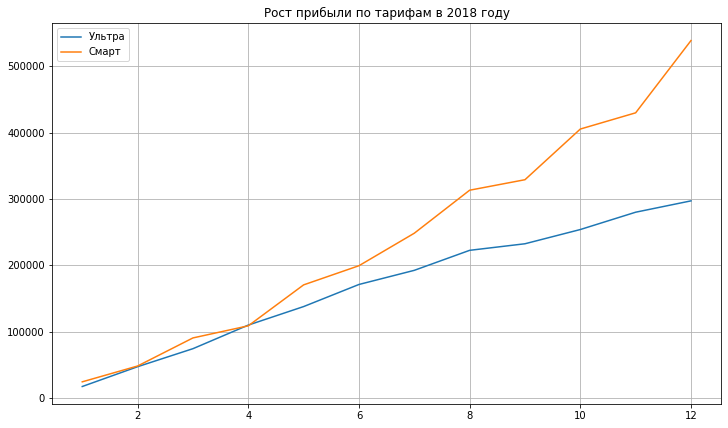

In [223]:
# рассмотрим гистограммы  для оценки выручки тарифов Смарт и Ультра
#data_general.pivot_table(index=['user_id'], values='profit').plot(grid = True, figsize=(12, 5)) 
profit_ultra = data_general.query('tariff == "ultra"')[['profit','month']].pivot_table(index = 'month', values = 'profit', aggfunc = ['sum'])
profit_smart = data_general.query('tariff == "smart"')[['profit','month']].pivot_table(index = 'month', values = 'profit', aggfunc = 'sum')

plt.figure(figsize=(12, 7))
plt.title('Рост прибыли по тарифам в 2018 году')

plt.plot(profit_ultra, label='Ультра')
plt.plot(profit_smart,  label='Смарт')
plt.legend()
plt.grid(True)
plt.show()


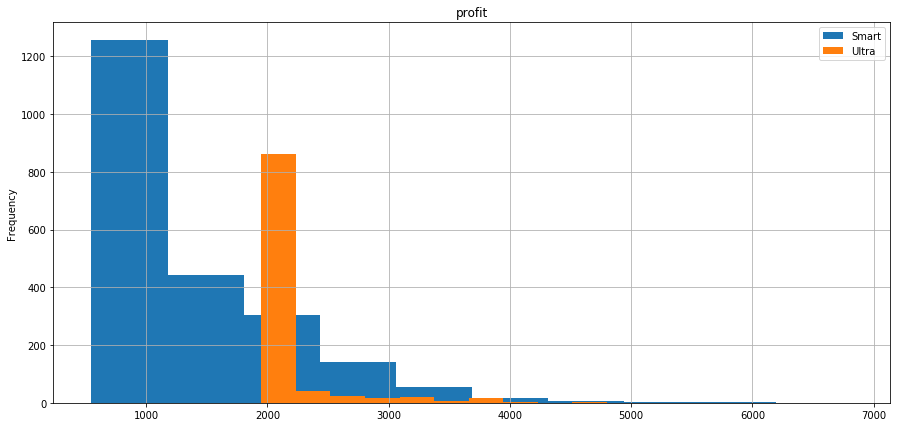

In [224]:
cols = ['profit']

for col in cols:
    fig, axes = plt.subplots(figsize=(15,7))
    plt.ylabel(col)
    plt.title(col)
    data_general.query('tariff == "smart"')[col].plot(  kind = 'hist', grid = True, bins = 10,  title= col )
    data_general.query('tariff == "ultra"')[col].plot(  kind = 'hist', grid = True, bins =10,  title= col )
    plt.legend(('Smart','Ultra'))
    plt.show

## Тариф смарт имеет более стремительный рост к концу года.
## Основная масса доходов помесяцам ледит около значений мин оплаты по тарифу

## Подведем промежуточные  итоги




 |Тариф|cр мин|мед мин|ср смс|мед смс|ср инет|мед инет|std звонки|std смс|std инет|var звонки|var смс|var инет|
 |-----|------|-------|------|-------|-------|--------|----|---|----|-----|-----|-----|
 |Ultra|540   |532    | 49   |  38   | 19    | 19     |325   |47|10|106105|2285|96|
 |Smart|429   |435    | 33   | 28    | 16    | 17     |195   |28|6|37974|796|32|  
 
 Из таблицы мы видим, что по  тарифу Ультра и среднее значение и медиана находятся достасточно далеко от бесплатных лимитов, соответственно очень мало людей превышают оплаченную норму.    
 Также мы видим, что стандартное отклонение и дисперсия в выборке по тарифу Ультра выше, но в большинстве разброс не выходит за пределы тарифов, а вот в тарифе Смарт, хотя значения, описывающие разброс и меньше, но они чаще выходят за бесплатный лимит услуг 
 
 

## Проверим гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
и примем ее за альтернативную

Сформулируем нулевую гипотезу как "Средняя выручка тарифов Смарт и Ультра равны".  
Сделаем это потому, что нулевая гипотеза принимается, как правило об возможности равенства средних двух генеральных совокупностей.  
Уровень критической значимости, исходя из достаточного количества строк в выборке и предположительной значимости ошибки первого рода (ошибемся, что выручка не равна) примем за 0,005

In [225]:
#рассчитаем среднее по тарифам
mean_ultra = data_general.query('tariff == "ultra"')[['profit']]
mean_smart = data_general.query('tariff == "smart"')[['profit']]
print('средний доход Ультра',mean_ultra.mean() )
print()
print('средний доход Смарт',mean_smart.mean() )

средний доход Ультра profit    2069.54
dtype: float64

средний доход Смарт profit    1304.80
dtype: float64


Рассчитаем дисперсию по среднему доходу ежемесячно по Тарифам

In [226]:
var_profit_ultra =np.var(mean_ultra, ddof=1)
var_profit_ultra

profit    140382.41
dtype: float64

In [227]:
var_profit_smart =np.var(mean_smart, ddof=1)
var_profit_smart

profit    683393.04
dtype: float64

# Расчитаем доверительный интервал для выборки

In [228]:
z_value = st.norm.ppf(0.975)
z_value

1.959963984540054

In [229]:
st_dev1 = np.std(data_general.profit)
st_dev1

800.640288247189

In [230]:
data_ultra['profit'].mean()


2069.543147208122

In [235]:
interval = z_value*(st_dev/np.sqrt(len(data_ultra['profit'])))
conf_inv = ((data_ultra['profit'].mean() - interval), (data_ultra['profit'].mean() + interval))
print('Доверительный интервал для прибыли по тарифу Ультра ', conf_inv)

Доверительный интервал для прибыли по тарифу Ультра  (2017.9291125034674, 2121.157181912776)


In [ ]:
#функция расчета доверительного интервала
def compute_ci(sample):
    """Функция расчитывает доверительный интервал, в качестве аргумента необходимо внести массив по которому требуется расчеты"""
    st_dev = np.std(sample)
    z_value = st.norm.ppf(q=0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample.mean() - interval, sample.mean() + interval)
    
    return conf_inv

In [236]:
compute_ci(data_general['sms'])

(37.03174209620662, 39.53079679613936)

In [237]:
#рассчитаем доверительный интервал по доходам для общей таблицы
compute_ci(data_general['profit'])

(1511.4894819862106, 1566.8490369932542)

In [238]:
#рассчитаем доверительный интервал по доходам для тарифа Ультра
compute_ci(data_ultra['profit'])

(2046.156618628033, 2092.9296757882107)

In [244]:
#рассчитаем доверительный интервал по доходам для тарифа Смарт
compute_ci(data_smart['profit'])

(1270.4850689385378, 1339.1066762386715)

### По доверительному интервалу мы видим, что нормальное распределение лежит в достатаочно узком интервале, что подверждют большие значения дисперсии. Для тарифа Ультра доверительный интервал находится в узком отрезке 2056-2092 руб, для тарифа Смарт 1270-1339 руб, что говорит о том, что многие пользователи платят более чем в два раза чем ежемесячный расчет по тарифу Смарт.   
(не очень то и смарт получается)) А еще среднее значение лежит ровно на середине доверительного интервала

In [240]:
# Зададим критический уровень статистической значимости, сделаем его на порядок меньше т.к. мы имеем тысячи строк в выборках
alpha = 0.005    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_ultra, 
    mean_smart, equal_var = False)

 # выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [1.15299677e-239]
Отвергаем нулевую гипотезу


***Полученное значение p-value говорит о том, что средний доход по тарифам неодинаков. С вероятностью в 0% такое различие можно получить случайно. Это явно достаточная вероятность, и мы можем сделать вывод о значимом различии между средними доходами по тарифам.***

## Проверим гипотезу: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;  
и примем ее за альтернативную

Сформулируем нулевую гипотезу как " Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов"
Сделаем это потому, что нулевая гипотеза принимается, как правило об возможности равенства средних двух генеральных совокупностей.  
Уровень критической значимости, исходя из меньшего,в одной из выборок, чем в предидущем сравнении, количества строк примем  за 0,01


In [241]:
#селаем необходимый срез данных и рассчитаем средний доход по городам
mean_moscow = data_general.query('city == "Москва"')[['profit']]
mean_other = data_general.query('city != "Москва"')[['profit']]

In [242]:
print('средний доход в Мск',mean_moscow.mean() )
print()
print('средний доход в других городах',mean_other.mean() )

средний доход в Мск profit    1554.59
dtype: float64

средний доход в других городах profit    1535.55
dtype: float64


In [243]:
# Зададим критический уровень статистической значимости, сделаем его на  меньше т.к. мы имеем сотни строк в выборках
alpha = 0.01    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_moscow, 
    mean_other, equal_var = False)

 # выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.57982122]
Не получилось отвергнуть нулевую гипотезу


***Полученное значение p-value говорит о том, что хотя  средний доход с людей из Мск и других городов слегка неодинаков, с вероятностью в почти 14% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними доходами по месяцам в столице и регионах.***


# Общие выводы

В процессе работы над проектом мы провели следующие действия:  
- описали проект
- поставили задачи
- подготовили данные, округлили в большую сторону значения звонков, смс и траффика, привели их к соответствующим форматам, перевести мб и гб и округлили  
- расчитали ежемесячную прибыль по двум тарифам и составили сводную таблицу для анализа  
- провели исследовательский анализ данных по использованию услуг клиентами и по доходу от каждого клиента помесячно
- проверили гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
- расчитали доверительный интервал и среднее для выборок по тарифам
- проверили гипотезу: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сводная таблица некоторых полученных значений:  

|Тариф|cр мин|мед мин|ср смс|мед смс|ср инет|мед инет|std звонки|std смс|std инет|var звонки|var смс|var инет|mean profit|
 |-----|------|-------|------|-------|-------|--------|----|---|----|-----|-----|-----|------|
 |Ultra|540   |532    | 49   |  38   | 19    | 19     |325   |47|10|106105|2285|96| 2069.54
 |Smart|429   |435    | 33   | 28    | 16    | 17     |195   |28|6|37974|796|32|  1304.80


### - Тариф Смарт более выгоден для Мегалайна, чем Ультра  
###  - Пользователи Смарта чаще выходят за рамки бесплатных лимитов по услугам
###  - Много людей не используют смс
###  - Нельзя делать вывод о значимом различии между средними доходами по месяцам в столице и регионах
###  - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается    